### 模型保存

Couple_Year_Income中有131个异常值
(6331, 32)
Couple_L12_Month_Pay_Amount中有372个异常值
(5959, 32)
Distribution of y_train Counter({0.0: 5259, 1.0: 104})
Distribution of y_test Counter({0.0: 584, 1.0: 12})
Package                            Version            
---------------------------------- -------------------
absl-py                            0.9.0              
alabaster                          0.7.12             
anaconda-client                    1.7.2              
anaconda-navigator                 1.9.12             
anaconda-project                   0.8.3              
argh                               0.26.2             
asn1crypto                         1.3.0              
astroid                            2.3.3              
astropy                            4.0                
astunparse                         1.6.3              
atomicwrites                       1.3.0              
attrs                              19.3.0             
autopep8                           1

unicodecsv                         0.14.1             
urllib3                            1.25.8             
wasabi                             0.7.0              
watchdog                           0.10.2             
wcwidth                            0.1.8              
webencodings                       0.5.1              
Werkzeug                           1.0.0              
wheel                              0.34.2             
widgetsnbextension                 3.5.1              
wordcloud                          1.7.0              
wrapt                              1.11.2             
wurlitzer                          2.0.0              
xgboost                            1.1.1              
xlrd                               1.2.0              
XlsxWriter                         1.2.7              
xlwt                               1.3.0              
xmltodict                          0.12.0             
yapf                               0.28.0             
zict      

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 23.9min finished


[13:50:19] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n_job } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


{'colsample_bytree': 0.5, 'max_depth': 9, 'reg_alpha': 0.05, 'subsample': 0.6}
train :
accuracy score is: 0.9878799179563678
precision score is: 1.0
recall score is: 0.375
auc: 0.6875
test :
accuracy score is: 0.9815436241610739
precision score is: 1.0
recall score is: 0.08333333333333333
auc: 0.5416666666666666


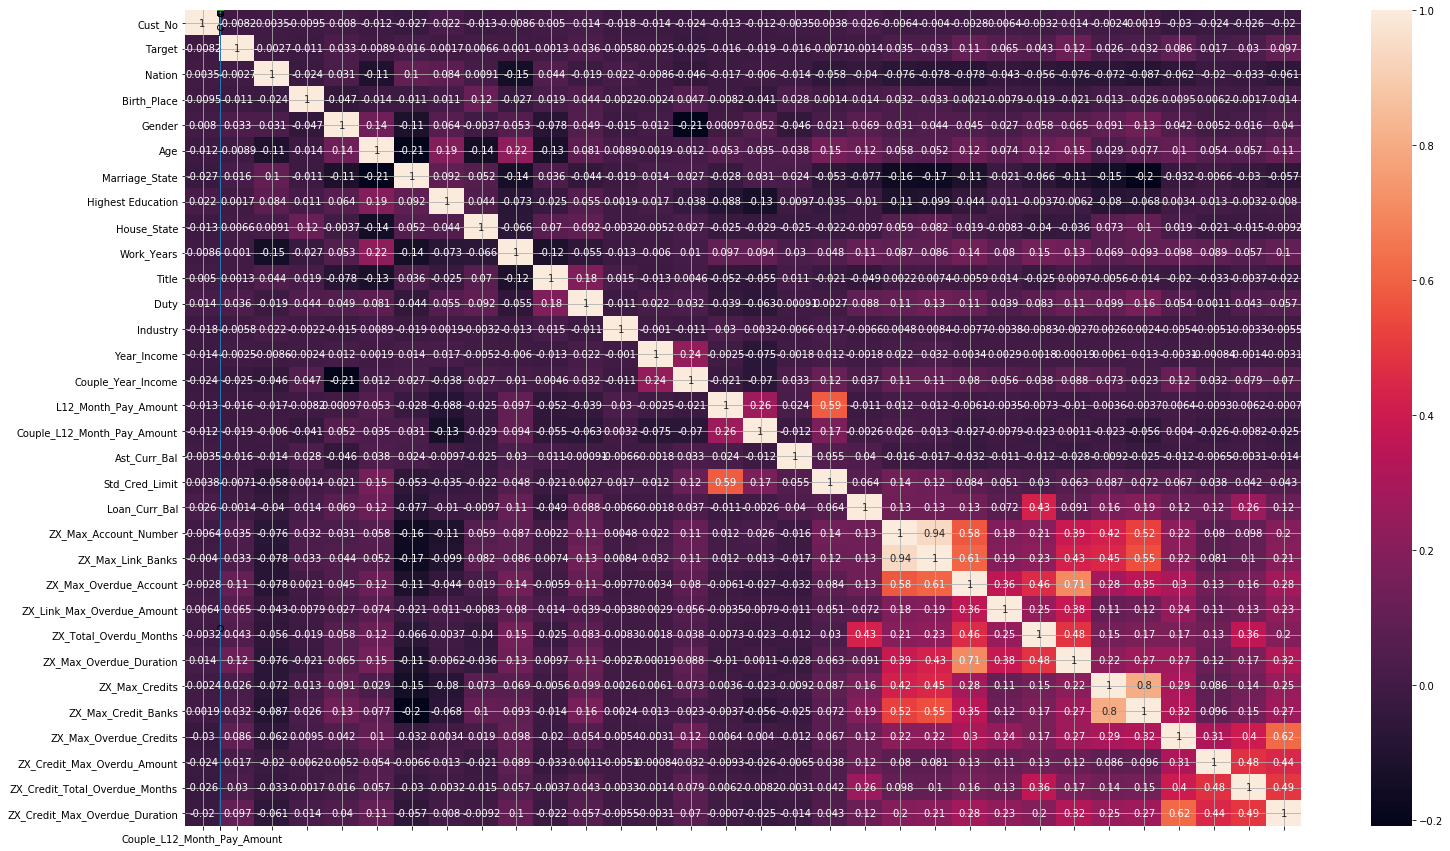

In [2]:
## 任务二 数据管理

########################################################################
# 步骤 1	导入常用包
# 导入常用包NumPy库和pandas库。
# 	NumPy库中的函数可以实现对数组的基本操作；
# 	pandas库提供了诸多的数据处理方法和时间序列的操作方法。
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")




# 步骤 2	从本地磁盘读取数据
# 地址为数据集dataset-credit-default.csv所在磁盘位置。
df = pd.read_csv("./data/dataset-credit-default.csv",encoding='utf-8', engine='python')
df

# 步骤 3	可视化数据
# 读取数据前五行，查看数据属性列。
df.head()
# 查看数据行列数。
df.shape
# 输出如下：
# (6462, 34)

# 查看Target的分布。
# 数据集中有6341条数据target为0，121条数据target为1，数据集极度不均衡，后续需进行不均衡数据处理。
df['Target'].value_counts()

# 步骤 4	数据处理
# 数据处理包括缺失值处理、异常值处理、特征降维、特征构造等。详细信息见实验手册《银行对私信贷数据特征工程构造实验手册》。
# 本环节需进行以下的数据处理步骤：
# （1）删除共线属性；
# （2）数值型变量异常值和缺失值处理；
# （3）类别型变量异常值和缺失值处理。
# *************************************************知识点讲解***********************************************************8
# （1）Matplotlib和seaborn是Python的数据可视化包。
# 	Matplotlib可绘制条形图，散点图，条形图，饼图，堆叠图等；
# 	seaborn是对Matplotlib的扩展。使用%matplotlib inline可省略plt.show()。
# Python中seaborn的heatmap()函数，其基本格式如下：
# seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt=’.2g’, annot_kws=None, linewidths=0, linecolor=’white’, cbar=True, cbar_kws=None, cbar_ax=None, square=False, ax=None, xticklabels=True, yticklabels=True, mask=None, **kwargs)
# heatmap()函数关键参数详解：
# 	data：矩阵数据集，可以是NumPy的数组（array），也可以是DataFrame。如果是DataFrame，那么df的index/column信息会分别对应到heatmap的columns和rows。
# 	linewidths：热力图矩阵之间的间隔大小。
# 	vmax,vmin：图例中最大值和最小值的显示值，没有该参数时默认不显示。
# （2）pandas库中的corr()函数。
# pandas库自带corr()函数，可实现相关系数计算。相关系数反映的是两个变量之间变化趋势的方向以及程度，值范围是[-1,1]。0表示两个变量不相关，正值表示正相关，负值表示负相关，值越大相关性越强。
# DataFrame.corr(method='pearson', min_periods=1)
# corr()函数关键参数详解：
# 	method：{‘pearson’, ‘kendall’, ‘spearman’}
# 	pearson：表示皮尔逊相关系数，适用于连续数据，正态分布数据，线性关系数据；
# 	kendall：表示肯德尔相关系数，也是一种秩相关系数，适合于定序变量或不满足正态分布假设的等间隔数据；
# 	spearman：表示斯皮尔曼相关系数，适合于定序变量或不满足正态分布假设的等间隔数据。
# （3）One-Hot编码：一位有效编码。
# 对于离散特征可以采用One-Hot编码的方式来处理，使用M位状态寄存器对M个状态进行编码，M个变量用M维表示，每个维度的数值或为1，或为0。
# 独热编码的实现使用Python中sklearn库的OneHotEncoder()函数，其基本格式如下：
# OneHotEncoder(n_values='auto', categorical_features='all', dtype=<class 'numpy.float64'>, sparse=True, handle_unknown='error')
# OneHotEncoder()函数关键参数详解：
# 	n_values=auto，默认为auto，表示每个特征使用几维的数值是由数据集自动推断的，即几种类别就使用几位来表示，也可以手动设置； 
# 	categorical_features=all，默认为all，表示对所有类别的特征都进行编码，也可以通过索引值或者bool值来指定部分特征进行编码；
# 	dtype=<class 'numpy.float64'>，表示编码数值格式，默认是浮点型；
# 	sparse=True，默认为True，表示编码的格式为稀疏的格式。若sparse=False则不用使用toarray()；
# 	handle_unknown=error，表示遇到未知的类别时返回的值，若为error，则返回error；若为ignore，则返回ignore。
# （4）Label-Encoding：标签编码。
# 有序分类变量数值之间存在一定的顺序关系，可直接使用划分后的数值进行数据建模。如分类变量{female，male}，可以直接离散化为{1,0}。
# 有序分类变量的离散化的实现使用Python中pandas库的map()函数，其基本使用格式如下：
# map(func, *iterables)


# 步骤 5	导入相关包
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# 步骤 6	删除共线属性
# 使用seaborn提供的热力图展现属性与属性之间的相关性。越接近于1的特征相关度越高，根据工程经验，属性之间的相关系数超过0.8即为共线属性，需选择其中一个属性删除。
#计算特征相关性并可视化
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(25, 15))
#生成热力图 annot参数是指显示数据 
sns.heatmap(corr_matrix, annot= True)


# 对于属性之间相关性过高的的特征，根据工程经验，以0.8为界，相关系数等于或大于0.8的，删除其中一个属性。
cols_pair_to_drop = []
for index_ in corr_matrix.index:
    for col_ in corr_matrix.columns:
        if corr_matrix.loc[index_,col_] >= 0.8 and index_!=col_ and (col_,index_) not in cols_pair_to_drop:
            cols_pair_to_drop.append((index_,col_))
#丢弃其中一个特征对
cols_to_drop = np.unique([col[1] for col in cols_pair_to_drop])
df.drop(cols_to_drop,axis=1,inplace=True)
df.head()


# 步骤 7	数值型变量异常值和缺失值处理
# 统计各特征的缺失率并按照降序排列，即ascending=False。
df_missing_stat = pd.DataFrame(df.isnull().sum()/df.shape[0],columns=['missing_rate']).reset_index()
df_missing_stat.sort_values(by='missing_rate',ascending=False)[:15]


# 采用箱形图可视化属性，查看数据分布后，判定如何填充。
df.boxplot(column=['Couple_Year_Income'])
 
df.boxplot(column=['Couple_L12_Month_Pay_Amount'])


# 从Couple_Year_Income和Couple_L12_Month_Pay_Amount两个箱形图中可得到，两个属性的缺失值和异常值较为严重。
# 可在删除带有异常值的样本的基础上填充缺失值，一般有两种选择：
# 	对数值型变量常用中位数填充缺失值，且在该业务场景下，使用中位数填充缺失值也符合实际的分布；
# 	直接删除。
# 按照经验，这两个属性和客户的还款能力有关，因此先尝试删除异常值，并填充缺失值。
# 删除Couple_Year_Income的异常值的索引，并用中位数填补缺失值。
item = 'Couple_Year_Income'
iqr = df[item].quantile(0.75) - df[item].quantile(0.25)
q_abnormal_L = df[item] < df[item].quantile(0.25) - 1.5 * iqr
q_abnormal_U = df[item] > df[item].quantile(0.75) + 1.5 * iqr
print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')
item_outlier_index = df[q_abnormal_L|q_abnormal_U].index
df.drop(index = item_outlier_index,inplace=True)
print(df.shape)
df[item] = df[item].fillna(df[item].median())
# 删除Couple_L12_Month_Pay_Amount的异常值的索引，并用中位数填补缺失值。
item = 'Couple_L12_Month_Pay_Amount'
iqr = df[item].quantile(0.75) - df[item].quantile(0.25)
q_abnormal_L = df[item] < df[item].quantile(0.25) - 1.5 * iqr
q_abnormal_U = df[item] > df[item].quantile(0.75) + 1.5 * iqr
print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')
item_outlier_index = df[q_abnormal_L|q_abnormal_U].index
df.drop(index = item_outlier_index,inplace=True)
print(df.shape)
df[item] = df[item].fillna(df[item].median())


# 步骤 8	类别型变量异常值和缺失值处理
# 经步骤6得知，Unit_Kind、Title、Industry、Occupation、House_State、Nation，Marriage_State，Highest Education和Duty有缺失值，可对变量进行重新编码，方法有Label-Encodeing和One-Hot两种。
# 	Label-Encodeing：是对每个类别随即分配一个整数值，如Femal和Male分别为0和1。当模型使用这些数据的时候，可能会有干扰，无法体现数据的权重．因此，对于特征值类别只有两类的数据，推荐使用label encodeing。
# 	One-Hot编码：当特征值的种类较多的话，会造成稀疏矩阵。．
# 可视化这些属性，查看是否有属性超过2个以上数值。可视化属性发现，属性Occupation含有多个数值。
# 因此本例将所有分类变量使用众数填充缺失值，并采用one-hot编码处理数据。
# plt.hist(df['Occupation'].value_counts(),color='b')
# 输出如下：
 
#使用中位数填充异常值
nominal_features = ['Nation','Birth_Place','Gender','Marriage_State','Highest Education','House_State','Work_Years','Unit_Kind','Title',
                   'Occupation','Duty','Industry']
numerical_features = [col_ for col_ in nominal_features if col_ not in nominal_features]
#调用Pandas的get_dummies方法
df_after_dummy = pd.get_dummies(df,columns=nominal_features,dummy_na=True)




# 模型选择
# 对私信贷违约项目是分类项目，target为0表示不违约，target为1表示违约。Logistic Regression是常用的经典分类模型，XGBoost模型是随机森林算法的衍生。目前在金融风控行业有成熟的落地应用，效果优良。因此，本例选择Logistic Regression和XGBoost模型进行模型计算，评估哪种模型更适合该项目。针对分类模型，本例选择accuracy score，precision score，recall score和auc多个衡量标准度量模型。
# 问题研讨
# 回忆Logistic Regression模型和XGBoost模型，并描述两种模型的基本形态、优缺点。

# 【参考答案】
# 2	模型计算及评估
# 模型计算阶段，分为以下步骤：
# 	导库；
# 	划分数据集；
# 	LR建模及评估；
# 	XGBoost建模及评估。
# 知识点讲解
# （1）回归模型，此方式只适用于缺失值是连续的情况。 
# Python的sklearn.linear_model库中的LinearRegression()函数可进行回归预测，以便进行数据填充。其基本格式如下：
# model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
# LinearRegression()函数关键参数详解：
# 	fit_intercept=True/False，Boolean数据，默认为True，可选参数，fit_intercept =True表示建模考虑截距，fit_intercept=False表示建模时不考虑截距；
# 	normalize=True/False，Boolean数据，默认为False，可选参数，fit_intercept=False表示忽略normalize参数，fit_intercept=True且normalize=True表示回归之前要对自变量X进行归一化；
# 	copy_X=True/False，Boolean，默认为True，可选参数，。copy_X=True代表自变量可以被copy，若为False则自变量将被重写；
# 	n_jobs，默认为1，表示计算时使用的核数，可选参数。
# （2）sklearn中的cross_val_score函数可以用来进行交叉验证。
# sklearn.cross_validation.cross_val_score(estimator, X, y=None, scoring=None,
# cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’)
# cross_val_score()函数关键参数详解：
# 	X：特征；
# 	y：标签；
# 	scoring：评价函数，包括accuary、mean_squared_error等；
# 	cv：交叉验证的k值，当输入为整数或者是None，估计器是分类器，y是二分类或者多分类，采用StratifiedKFold进行数据划分。


### 步骤 1	导库


# 引入StandardScaler标准化工具库
from sklearn.preprocessing import StandardScaler
#引入逻辑回归和特征选择的库
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit # 分层分割
#引入评价指标的库
from sklearn.metrics import make_scorer,fbeta_score,recall_score,f1_score
from imblearn import over_sampling
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,precision_score,recall_score,roc_auc_score


### 步骤 2	划分数据集


# 需将数据集划分成训练集和测试集，一般采用随机抽样、分层抽样。此案例数据集的训练集和测试集的划分比例为10：1。
from sklearn.model_selection import train_test_split
from collections import Counter
x_cols = [col for col in df_after_dummy.columns if col!='Cust_No' and col!='Target']
y_col = 'Target'
df_after_dummy = df_after_dummy.astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(df_after_dummy[x_cols],
                    df_after_dummy[y_col],
                    test_size=0.1, #分割比例
                    random_state=42, #随机数种子
                    shuffle=True, #是否打乱顺序 
     stratify=df_after_dummy[y_col])#指定以Target的比例做分层抽样
print('Distribution of y_train {}'.format(Counter(y_train)))
print('Distribution of y_test {}'.format(Counter(y_test)))


!pip list

### 步骤 3	LR建模及评估


# 数据分布范围过大，且数据量纲不同，因此建模前需要对数据做标准化处理后再建模。
#对训练集和测试集做标准化
std_scaler = StandardScaler().fit(df_after_dummy[x_cols])
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)




# 处理不均衡数据，采用过采样方法将Target=0与Target=1比例设置为10：1，即设置SMOTE的参数ratio=0.1。
# 过采样前Target=0有5259条数据，Target=1有104条数据。过采样后Target=0有5259条数据，Target=1有525条数据。
print('Original dataset shape {}'.format(Counter(y_train)))
#ratio指定过采样比例，此处为10:1

smote_model = over_sampling.SMOTE(sampling_strategy=0.1, random_state=7)
# smote_model = over_sampling.SMOTE(random_state=7, ratio=0.1)#出错。。。。。。。。。。

X_train_res,y_train_res = smote_model.fit_sample(X_train_std,y_train)
print('Resampled dataset shape {}'.format(Counter(y_train_res)))


# 建模：
#声明LR模型，solver使用liblinear，最大迭代次数为500，交叉验证5次
lr_model = LogisticRegression(solver='liblinear',max_iter=500)
cv_scores = cross_val_score(lr_model, X_train_res, y_train_res, scoring='roc_auc', cv=5)  
print('cross validation score of model version1 {}'.format(cv_scores))

### 步骤 4	调参


#验证曲线
c_range=[0.001,0.01,0.1,1.0]
solvers = ['liblinear','lbfgs','newton-cg','sag']
tuned_parameters = dict(solver=solvers, C=c_range)
lr_model = LogisticRegression(solver='liblinear',max_iter=500)
#网格搜索
grid= GridSearchCV(lr_model, tuned_parameters,cv=5, scoring='roc_auc')
grid.fit(X_train_res,y_train_res)
print('best score for model {}'.format(grid.best_score_))
print('best parameters for model {}'.format(grid.best_params_))


### 步骤 5	验证


# 将C设置为1，solver设置为newton-cg，重新建模。
lr_model_final = LogisticRegression(C=1.0,solver='newton-cg',max_iter=500)
lr_model_final.fit(X_train_res,y_train_res)
# 分类模型性能查看函数
def perfomance_clf(model,X,y,name=None):
    y_predict = model.predict(X)
    if name:
        print(name,':')
    print(f'accuracy score is: {accuracy_score(y,y_predict)}')
    print(f'precision score is: {precision_score(y,y_predict)}')
    print(f'recall score is: {recall_score(y,y_predict)}')
    print(f'auc: {roc_auc_score(y,y_predict)}')
print('         ')
# 训练集性能指标
perfomance_clf(lr_model_final,X_train_std,y_train,name='trainModel')
# 测试集性能指标
perfomance_clf(lr_model_final,X_test_std,y_test,name='testModel')


### 步骤 6	导包


import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PowerTransformer


### 步骤 7	模型计算与评估

xgb_clf = xgb.XGBClassifier(objective='binary:logistic',
                            n_job=-1,
                            booster='gbtree',
                            n_estimators=1000,
                            learning_rate=0.01)
# 参数设定
xgb_params = {'max_depth':[6,9],    # 注意参数设置，数量多了会更加耗时
             'subsample':[0.6,0.9],
             'colsample_bytree':[0.5,0.6],
             'reg_alpha':[0.05,0.1]}
# 参数搜索
xgb_gridsearch = GridSearchCV(xgb_clf,xgb_params,cv=3,n_jobs=-1,
                                 scoring='roc_auc',verbose=10,refit=True)
# 工作流管道
pipe_xgb = Pipeline([
    ('sc',StandardScaler()),
    ('pow_trans',PowerTransformer()),
    ('xgb_grid',xgb_gridsearch)
])
# 搜索参数并训练模型
pipe_xgb.fit(X_train,y_train)
# 最佳参数组合
print(pipe_xgb.named_steps['xgb_grid'].best_params_)
# 训练集性能指标
perfomance_clf(pipe_xgb,X_train,y_train,name='train')
# 测试集性能指标
perfomance_clf(pipe_xgb,X_test,y_test,name='test')


In [ ]:

# 深度学习的训练一般需要一定时间，因此，需要把训练好的模型保存下来，以便之后再训练或把模型分享给别人。模型的保存也可以叫做持久化。
# 将LR模型保存。
#持久化，把模型保存到本地磁盘

from sklearn.externals import joblib
joblib.dump(lr_model_final,'lr_model_final.pkl')
#从磁盘加载模型
lr_model_load = joblib.load('lr_model_final.pkl')
y_test_pred = lr_model_load.predict(X_test_std)
print('roc_auc of lr_model score:{}'.format(roc_auc_score(y_test,y_test_pred)))
